# DAT210x - Programming with Python for DS

## Module5- Lab1

### Lab Assignment 1
Many U.S. cities, the U.S. federal government, and even other cities and governments abroad have started subscribing to an Open Data policy, because some data should be transparent and available to everyone to use and republish freely, without restrictions from copyright, patents, or other mechanisms of control. After reading their [terms of use](http://www.cityofchicago.org/city/en/narr/foia/data_disclaimer.html), in this lab you'll be exploring the City of Chicago's Crime data set, which is part of their Open Data initiative.
<ol>
<li>Start by navigating over to the [City of Chicago's Crimes dataset](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) exploration page. It lists crimes from 2001 to the present, but you'll only be targeting **Gambling**. The city's website itself has hundreds of other datasets you can browse and do machine learning on.
<li>Open up the /Module5/**assignment1.py** starter code, and follow the directions to acquire the dataset and properly set it up.
<li>Fill out the doKMeans method to find and plot **seven clusters** and print out their centroids. These could be places a police officer investigates to check for on-going illegal activities.
<li>Re-run your assignment a few times over, looking at your printed and plotted results. Then answer the following questions.
Note: If Pandas complains about your data, you can use dropna() on any row that has nans in it.

Start by importing whatever you need to import in order to make this lab work:

In [77]:
# .. your code here ..
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


matplotlib.style.use('ggplot') # Look Pretty

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have the dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [78]:
# .. your code here ..
df=pd.read_csv('Datasets/Crimes_-_2001_to_present.csv')
df.head()
df.count()

# df = pd.read_csv('Datasets/Crimes_-_2001_to_present.csv')


ID                      13950
Case Number             13950
Date                    13950
Block                   13950
IUCR                    13950
Primary Type            13950
Description             13950
Location Description    13950
Arrest                  13950
Domestic                13950
Beat                    13950
District                13950
Ward                    12826
Community Area          12826
FBI Code                13950
X Coordinate            13851
Y Coordinate            13851
Year                    13950
Updated On              13950
Latitude                13851
Longitude               13851
Location                13851
dtype: int64

Get rid of any _rows_ that have nans in them:

In [79]:
# .. your code here ..
df = df.dropna(axis=0)
df.count()



ID                      12736
Case Number             12736
Date                    12736
Block                   12736
IUCR                    12736
Primary Type            12736
Description             12736
Location Description    12736
Arrest                  12736
Domestic                12736
Beat                    12736
District                12736
Ward                    12736
Community Area          12736
FBI Code                12736
X Coordinate            12736
Y Coordinate            12736
Year                    12736
Updated On              12736
Latitude                12736
Longitude               12736
Location                12736
dtype: int64

Display the `dtypes` of your dset:

In [80]:
# .. your code here ..
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [81]:
# .. your code here ..
df.Date=pd.to_datetime(df.Date)
# df.Date = pd.to_datetime(df.Date)

df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [85]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    # .. your code here ..
    df=df.loc[:,['Longitude','Latitude']]



    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    # .. your code here ..
    model=KMeans(n_clusters=7)
    model.fit(df)


    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.61949436  41.80348438]
 [-87.75693195  41.89348542]
 [-87.63125273  41.69658783]
 [-87.58259352  41.75264186]
 [-87.684885    41.98183762]
 [-87.70954894  41.87816103]
 [-87.66466692  41.77282259]]


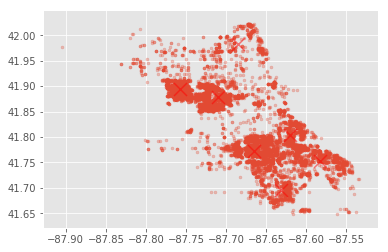

In [86]:
# Print & Plot your data
doKMeans(df)

In [87]:
# TODO: Filter out the data so that it only contains samples that have a Date > '2011-01-01', using indexing. Then,
# in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.
# .. your code here ..
df2=df[df['Date']>'2011-01-01']

[[-87.71049693  41.87507525]
 [-87.63524766  41.70513332]
 [-87.66411633  41.77626426]
 [-87.75477854  41.89006738]
 [-87.58017386  41.75049617]
 [-87.61774712  41.79199609]
 [-87.68522419  41.98536496]]


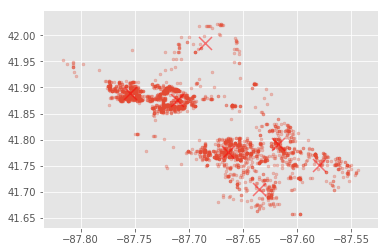

In [88]:
# Print & Plot your data
doKMeans(df2)

### Lab Questions
Did your centroid locations change after you limited the date range to +2011?
<p>**slightly**

What about during successive runs of your assignment? Any centroid location changes happened there?
<p>**All clusters have moved but only slightly, and the centroid arrangement still has the same shape for the most part** 